In [29]:
import numpy as np
import coop_post_processing as cpp
import matplotlib.pyplot as plt
import os
# suppress warnings
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from functools import partial
import healpy as hp
from astropy.io import fits
from astropy import wcs


In [2]:
path = "/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/orient_by_maglim_75/"
rot_angle_full = []
ra_full = []
dec_full = []
parity_full = []
for file in os.listdir(path):
    if file.startswith("redmapper_lambdagt20_") and "20pt0_orientXYUP" in file and file.endswith(".fits"):
        
        rot_angle,ra,dec,parity = cpp.get_peakinfo(path+file)
        rot_angle_full.extend(rot_angle)
        ra_full.extend(ra)
        dec_full.extend(dec)
        parity_full.extend(parity)
        
        # first, checking the full distribution: is it consistent with uniform for this bin?

        stat, pval = stats.ks_1samp(rot_angle, partial(stats.uniform.cdf, loc=np.amin(rot_angle), scale=np.amax(rot_angle)-np.amin(rot_angle)))
        # the null hypothesis is that the distribution is uniform
        # we can reject this hypothesis with pval < 0.05
        print("p-value for uniform distribution: ", pval)
        if pval < 0.05:
            print("We can reject the null hypothesis that the distribution is uniform.")
# make all arrays
rot_angle_full = np.array(rot_angle_full)
ra_full = np.array(ra_full)
dec_full = np.array(dec_full)
parity_full = np.array(parity_full)


p-value for uniform distribution:  0.5114371597168001
p-value for uniform distribution:  0.5995685895846935
p-value for uniform distribution:  0.5184018624980256
p-value for uniform distribution:  0.6698067958950624
p-value for uniform distribution:  0.2096605563816129
p-value for uniform distribution:  0.14828118944779467
p-value for uniform distribution:  0.6168586848387742
p-value for uniform distribution:  0.25295441058026513
p-value for uniform distribution:  0.19716281932868607
p-value for uniform distribution:  0.446371466286001
p-value for uniform distribution:  0.25733422531008393
p-value for uniform distribution:  0.11984318316103976
p-value for uniform distribution:  0.8068180201807373
p-value for uniform distribution:  0.9813049060352769
p-value for uniform distribution:  0.33657944185667693
p-value for uniform distribution:  0.10072477345002129
p-value for uniform distribution:  0.29505577922034765
p-value for uniform distribution:  0.8451098449048131
p-value for uniform d

(array([49., 56., 69., 67., 52., 62., 60., 56., 54., 60., 55., 65., 58.,
        73., 64., 55., 50., 67., 65., 60., 54., 60., 49., 70., 73., 56.,
        63., 53., 55., 66., 62., 66., 57., 53., 49., 57., 57., 43., 48.,
        65., 53., 55., 61., 59., 61., 56., 48., 66., 65., 58., 62., 50.,
        56., 53., 47., 64., 55., 61., 58., 61., 55., 57., 41., 46., 52.,
        51., 62., 60., 62., 58., 61., 66., 67., 71., 59., 67., 55., 61.,
        64., 56., 67., 48., 80., 41., 57., 64., 51., 51., 59., 65., 58.,
        64., 56., 59., 65., 71., 70., 50., 56., 61.]),
 array([-1.56936872e+00, -1.50656363e+00, -1.44375854e+00, -1.38095345e+00,
        -1.31814837e+00, -1.25534328e+00, -1.19253819e+00, -1.12973310e+00,
        -1.06692801e+00, -1.00412292e+00, -9.41317832e-01, -8.78512744e-01,
        -8.15707655e-01, -7.52902566e-01, -6.90097477e-01, -6.27292389e-01,
        -5.64487300e-01, -5.01682211e-01, -4.38877122e-01, -3.76072034e-01,
        -3.13266945e-01, -2.50461856e-01, -1.87656767e

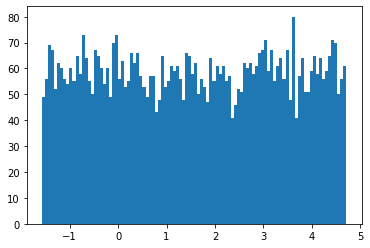

In [3]:
plt.hist(rot_angle_full,bins=100)

In [4]:

# first, checking the full distribution: is it consistent with uniform?

stat, pval = stats.ks_1samp(rot_angle_full, partial(stats.uniform.cdf, loc=np.amin(rot_angle_full), scale=np.amax(rot_angle_full)-np.amin(rot_angle_full)))
# the null hypothesis is that the distribution is uniform
# we can reject this hypothesis with pval < 0.05
print("p-value for uniform distribution: ", pval)
if pval < 0.05:
    print("We can reject the null hypothesis that the distribution is uniform.")




p-value for uniform distribution:  0.39528721080800944


In [5]:
print(np.sum(parity_full==1), np.sum(parity_full==-1)) # they are very close to equal

2959 2907


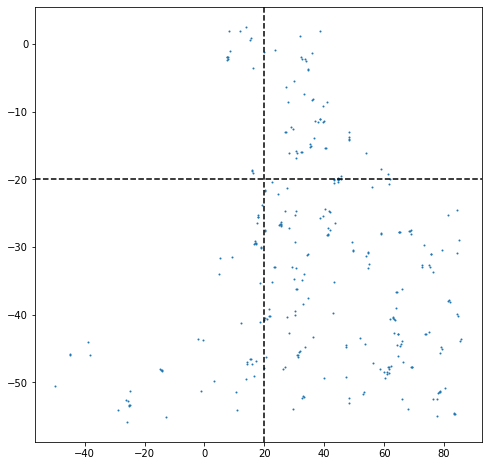

In [6]:
# plot the points on a map in world coordinate system

plt.figure(figsize=(8,8))
plt.scatter(ra, dec, s=1)
# divide into four parts
plt.axvline(x=20, color='k', linestyle='--')
plt.axhline(y=-20, color='k', linestyle='--')

In [7]:
rot_angle_full = (rot_angle_full + np.pi) % (2*np.pi) - np.pi 
rot_angle_full[rot_angle_full < 0] += np.pi

Number of clusters in each quadrant:  1300 342 1252 2972


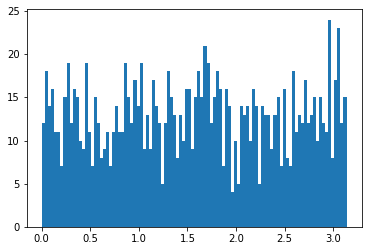

p-value for uniform distribution in quadrant 1:  0.6991787425290577
percentage of right-flipped points: 0.5123076923076924


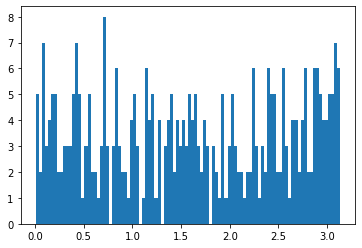

p-value for uniform distribution in quadrant 2:  0.12897733462539163
percentage of right-flipped points: 0.4298245614035088


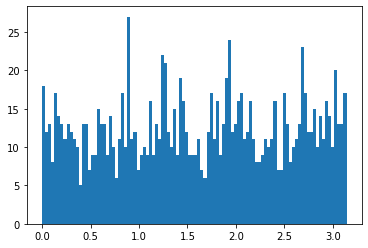

p-value for uniform distribution in quadrant 3:  0.36964772014949376
percentage of right-flipped points: 0.5279552715654952


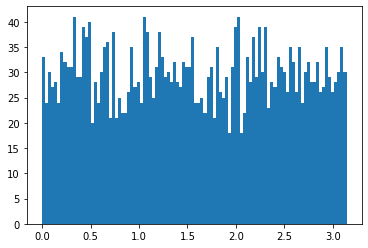

p-value for uniform distribution in quadrant 4:  0.7628933801799734
percentage of right-flipped points: 0.4996635262449529


<Figure size 432x288 with 0 Axes>

In [8]:
# now divide into four parts spatially and check each one
# first, get the spatial distribution of the clusters
quad1 = (ra_full > 20) & (dec_full > -20)
quad2 = (ra_full < 20) & (dec_full > -20)
quad3 = (ra_full < 20) & (dec_full < -20)
quad4 = (ra_full > 20) & (dec_full < -20)
print("Number of clusters in each quadrant: ", np.sum(quad1), np.sum(quad2), np.sum(quad3), np.sum(quad4))

# now check the distribution in each quadrant
stat, pval = stats.ks_1samp(rot_angle_full[quad1], partial(stats.uniform.cdf, loc=np.amin(rot_angle_full[quad1]), scale=np.amax(rot_angle_full[quad1])-np.amin(rot_angle_full[quad1])))
plt.hist(rot_angle_full[quad1],bins=100)
plt.show()
plt.clf()
print("p-value for uniform distribution in quadrant 1: ", pval)
print("percentage of right-flipped points:", np.sum(parity_full[quad1]==1)/len(parity_full[quad1]))
stat, pval = stats.ks_1samp(rot_angle_full[quad2], partial(stats.uniform.cdf, loc=np.amin(rot_angle_full[quad2]), scale=np.amax(rot_angle_full[quad2])-np.amin(rot_angle_full[quad2])))
plt.hist(rot_angle_full[quad2],bins=100)
plt.show()
plt.clf()
print("p-value for uniform distribution in quadrant 2: ", pval)
print("percentage of right-flipped points:", np.sum(parity_full[quad2]==1)/len(parity_full[quad2]))
stat, pval = stats.ks_1samp(rot_angle_full[quad3], partial(stats.uniform.cdf, loc=np.amin(rot_angle_full[quad3]), scale=np.amax(rot_angle_full[quad3])-np.amin(rot_angle_full[quad3])))
plt.hist(rot_angle_full[quad3],bins=100)
plt.show()
plt.clf()
print("p-value for uniform distribution in quadrant 3: ", pval)
print("percentage of right-flipped points:", np.sum(parity_full[quad3]==1)/len(parity_full[quad3]))

stat, pval = stats.ks_1samp(rot_angle_full[quad4], partial(stats.uniform.cdf, loc=np.amin(rot_angle_full[quad4]), scale=np.amax(rot_angle_full[quad4])-np.amin(rot_angle_full[quad4])))
plt.hist(rot_angle_full[quad4],bins=100)
plt.show()
plt.clf()
print("p-value for uniform distribution in quadrant 4: ", pval)
print("percentage of right-flipped points:", np.sum(parity_full[quad4]==1)/len(parity_full[quad4]))


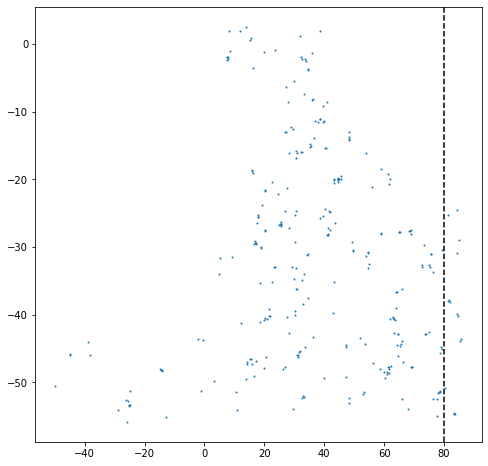

In [9]:
# isolate regions near the edge

plt.figure(figsize=(8,8))
plt.scatter(ra, dec, s=1)
# divide into four parts
plt.axvline(x=80, color='k', linestyle='--')


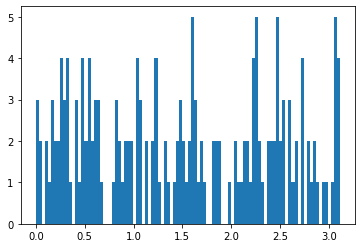

p-value for uniform distribution in quadrant 1:  0.3420344424436699
percentage of right-flipped points: 0.5028248587570622


<Figure size 432x288 with 0 Axes>

In [10]:
# now divide into four parts spatially and check each one
# first, get the spatial distribution of the clusters
rightedge = (ra_full > 80)

# now check the distribution in each quadrant
stat, pval = stats.ks_1samp(rot_angle_full[rightedge], partial(stats.uniform.cdf, loc=np.amin(rot_angle_full[rightedge]), scale=np.amax(rot_angle_full[rightedge])-np.amin(rot_angle_full[rightedge])))
plt.hist(rot_angle_full[rightedge],bins=100)
plt.show()
plt.clf()
print("p-value for uniform distribution in quadrant 1: ", pval)
print("percentage of right-flipped points:", np.sum(parity_full[rightedge]==1)/len(parity_full[rightedge]))


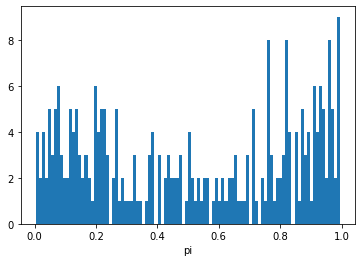

p-value for uniform distribution in quadrant 1:  0.0005562532016199472
percentage of right-flipped points: 0.483271375464684


<Figure size 432x288 with 0 Axes>

In [11]:
# isolate regions near the left edge
leftedge = (ra_full < 10) & (dec_full >-40)

# now check the distribution in each quadrant
stat, pval = stats.ks_1samp(rot_angle_full[leftedge], partial(stats.uniform.cdf, loc=np.amin(rot_angle_full[leftedge]), scale=np.amax(rot_angle_full[leftedge])-np.amin(rot_angle_full[leftedge])))
plt.hist(rot_angle_full[leftedge]/np.pi,bins=100)
plt.xlabel("pi")
plt.show()
plt.clf()
print("p-value for uniform distribution in quadrant 1: ", pval)
print("percentage of right-flipped points:", np.sum(parity_full[leftedge]==1)/len(parity_full[leftedge]))


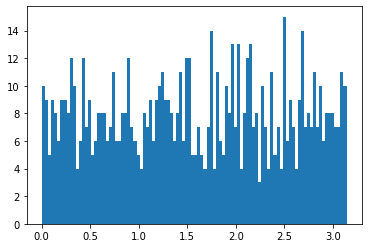

p-value for uniform distribution in bottom edge:  0.9739081465546642
percentage of right-flipped points: 0.49313358302122345


<Figure size 432x288 with 0 Axes>

In [12]:
# isolate regions near the bottom edge
bottomedge = (dec_full < -50)

# now check the distribution in each quadrant
stat, pval = stats.ks_1samp(rot_angle_full[bottomedge], partial(stats.uniform.cdf, loc=np.amin(rot_angle_full[bottomedge]), scale=np.amax(rot_angle_full[bottomedge])-np.amin(rot_angle_full[bottomedge])))
plt.hist(rot_angle_full[bottomedge],bins=100)
plt.show()
plt.clf()
print("p-value for uniform distribution in bottom edge: ", pval)
print("percentage of right-flipped points:", np.sum(parity_full[bottomedge]==1)/len(parity_full[bottomedge]))


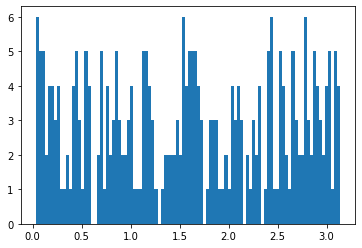

p-value for uniform distribution in bottom edge:  0.6409454765416498
percentage of right-flipped points: 0.46853146853146854


<Figure size 432x288 with 0 Axes>

In [13]:
# isolate regions near the top edge
topedge = (dec_full > 0)

# now check the distribution in each quadrant
stat, pval = stats.ks_1samp(rot_angle_full[topedge], partial(stats.uniform.cdf, loc=np.amin(rot_angle_full[topedge]), scale=np.amax(rot_angle_full[topedge])-np.amin(rot_angle_full[topedge])))
plt.hist(rot_angle_full[topedge],bins=100)
plt.show()
plt.clf()
print("p-value for uniform distribution in bottom edge: ", pval)
print("percentage of right-flipped points:", np.sum(parity_full[topedge]==1)/len(parity_full[topedge]))


In [14]:
len(ra_full)

5866

(-60.0, 0.0)

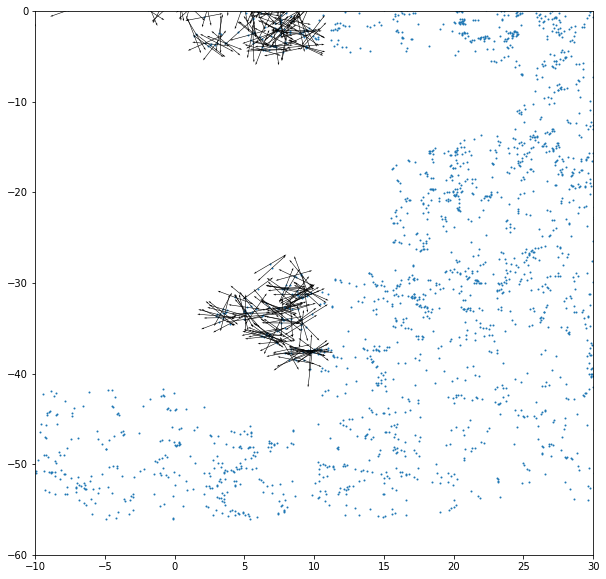

In [49]:
# plot the failure(s)
u,v = cpp.get_vector_components(rot_angle_full[leftedge])
plt.figure(figsize=(10,10))
plt.scatter(ra_full, dec_full, s=1)

# divide into four parts
plt.quiver(ra_full[leftedge], dec_full[leftedge], -u, v, width=0.001, color = 'k')
plt.quiver(ra_full[leftedge], dec_full[leftedge], u, -v, width=0.001, color = 'k')
plt.xlim([-10,30])
plt.ylim([-60,0])


In [24]:
def read_amp_map(amp_file):
    amp_map = fits.open(amp_file)
    amp_map[1].header['TTYPE3'] = 'ID2'
    amp_map.writeto(amp_file, overwrite=True)
    amp_map.close()
    return hp.read_map(amp_file, field=0)

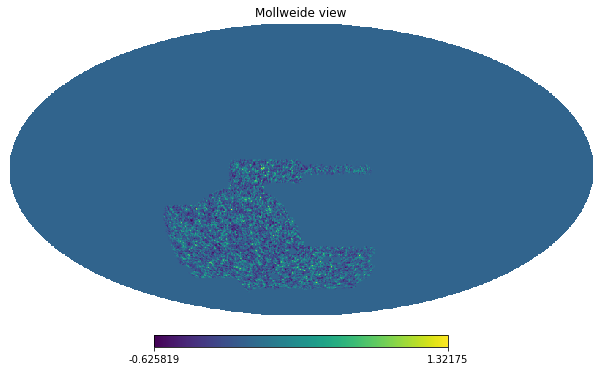

In [27]:
# load one of the smoothed maps
smoothmap = read_amp_map("/mnt/raid-cita/mlokken/data/number_density_maps/maglim/odmap_100_2743_2943Mpc_AMPLITUDE_fwhm24a.fits")
hp.mollview(smoothmap)

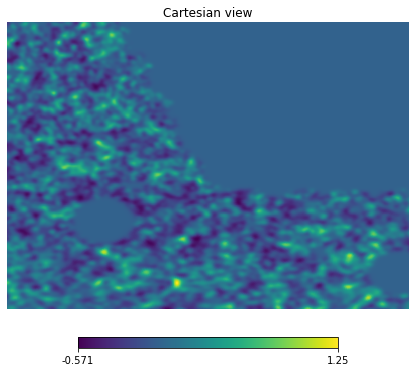

In [68]:
lonmin = -20
lonmax = 15
latmin = -50
latmax = -25
nd_map_flat = hp.cartview(smoothmap, latra=[latmin, latmax], lonra=[lonmin, lonmax], return_projected_map=True)


In [69]:
w = wcs.WCS(naxis=2)

height = float(nd_map_flat.shape[0])
length = float(nd_map_flat.shape[1])
w = wcs.WCS(naxis=2)
cdeltaX, crvalX = (lonmin-lonmax)/length, (lonmin+lonmax)/2.
cdeltaY, crvalY = (latmin-latmax)/height, (latmin+latmax)/2.
w.wcs.crpix = length/2., height/2.
w.wcs.crval = [crvalX,crvalY]
w.wcs.cdelt = np.array([cdeltaX,cdeltaY])
w.wcs.ctype = ["RA", "DEC"]

In [70]:
Xpix,Ypix = w.all_world2pix(ra_full[leftedge],dec_full[leftedge],0)


(0.0, 400.0)

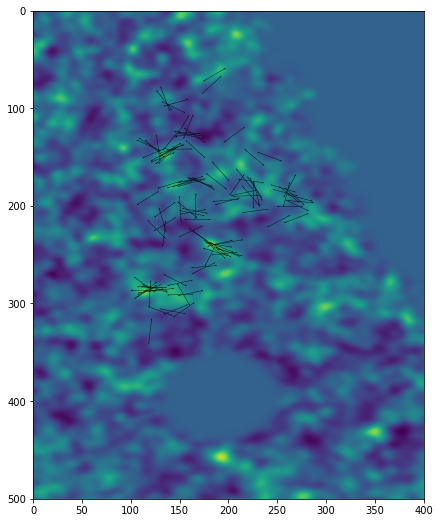

In [74]:
fig,ax = plt.subplots(ncols=1,nrows=1, figsize=[7,12])
ax.imshow(nd_map_flat[::-1])
ax.quiver(Xpix, Ypix, -u, v, width=0.001, color = 'k')
ax.quiver(Xpix, Ypix, u, -v, width=0.001, color = 'k')
plt.ylim([500,0])
plt.xlim([0,400])


In [63]:
# it's OK

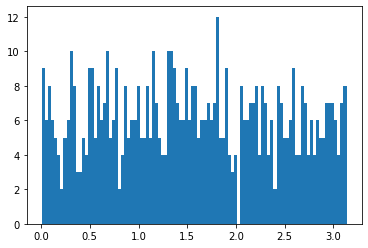

p-value for uniform distribution in bottom edge:  0.5759882703934398
percentage of right-flipped points: 0.5193548387096775


<Figure size 432x288 with 0 Axes>

In [77]:
# isolate regions near extendedness in Sevilla-Noarbe et al 2021
const_ra = (ra_full>26) & (ra_full<32)

# now check the distribution in each quadrant
stat, pval = stats.ks_1samp(rot_angle_full[const_ra], partial(stats.uniform.cdf, loc=np.amin(rot_angle_full[const_ra]), scale=np.amax(rot_angle_full[const_ra])-np.amin(rot_angle_full[const_ra])))
plt.hist(rot_angle_full[const_ra],bins=100)
plt.show()
plt.clf()
print("p-value for uniform distribution in bottom edge: ", pval)
print("percentage of right-flipped points:", np.sum(parity_full[const_ra]==1)/len(parity_full[const_ra]))
